### NLP With Hotel Review Part 1
#### Renan Peneluppi

In [1196]:
#import packages I will likely need for this assigment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [1197]:
#open and check file
mydf = pd.read_csv('data/UK_Hotel_Reviews/UK_Hotel_Reviews.csv')
mydf.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,1 15 Templeton Place Earl s Court Kensington a...,244,6/30/2017,8.5,K K Hotel George,United Kingdom,Room wasn t ready on arrival after travelling...,94,1831,Fantastic location very clean room someone ca...,23,3,5.8,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",34 days,51.491888,-0.194971
1,1 15 Templeton Place Earl s Court Kensington a...,244,6/27/2017,8.5,K K Hotel George,United Kingdom,Our room allocated wasn t up to our expectati...,40,1831,Breakfast was excellent Staff in the restaura...,25,3,6.7,"[' Leisure trip ', ' Group ', ' Classic Triple...",37 days,51.491888,-0.194971
2,1 15 Templeton Place Earl s Court Kensington a...,244,6/27/2017,8.5,K K Hotel George,United Kingdom,The cooked elements of breakfast could have b...,18,1831,The garden was a bonus Lovely area to have so...,25,12,8.3,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",37 days,51.491888,-0.194971
3,1 15 Templeton Place Earl s Court Kensington a...,244,6/25/2017,8.5,K K Hotel George,United Kingdom,The room was a lot smaller than advertised I ...,155,1831,Great location it s easy to find and incredib...,97,5,7.1,"[' Leisure trip ', ' Solo traveler ', ' Classi...",39 days,51.491888,-0.194971
4,1 15 Templeton Place Earl s Court Kensington a...,244,6/25/2017,8.5,K K Hotel George,United Kingdom,Lower ground floor room L01 possibly the smal...,32,1831,Location first and foremost Lovely gardens,8,2,5.0,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",39 days,51.491888,-0.194971


In [1198]:
# check for nulls

mydf.isnull().sum()

#There no nulls top take care of

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

#### What is the shape of the data set?

In [1199]:
mydf.shape
# A 170649 rows and 17 columns

(170649, 17)

#### The reviews provided are all given as decimal values. Convert them into integers from 1 to 10

In [1200]:
# to this point I'm only rounding the reviewer score..
# The average score is an average, nor sure this should be rounded up
#Average_Score: Average Score of the hotel, calculated based on the latest comment in the last year. as per kaggle
mydf.Reviewer_Score = mydf.Reviewer_Score.round()

In [1201]:
mydf['Reviewer_Score'].head()

0    6.0
1    7.0
2    8.0
3    7.0
4    5.0
Name: Reviewer_Score, dtype: float64

###  The reviews are scored from 1 to 10. What do you expect the distribution of scores to look like?
A: I would expect the ratings to be distributed in above and below 5 somewhat equally. 

### What is the actual distribution of reviews?


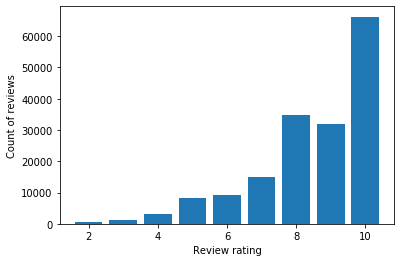

In [1202]:
#plot the review distribution
values, counts = np.unique(mydf['Reviewer_Score'], return_counts=True)

plt.figure()
plt.bar(values, counts)
plt.xlabel('Review rating')
plt.ylabel('Count of reviews')
plt.show()

# Seems that most ratings are 8 to 10, people have been generous with their scores. 

### Given this will be a classification problem, what is a potential problem with this distribution?

A: with such a skewed rating distribution it's hard to understand what rating is acctually a positive one. When fitting a model it will be very biased, trending to overfit rating 8 to 10

### This data set has a good mix of numeric and non-numeric columns. Which columns are numeric? Which are non-numeric? Can you turn some of the non-numeric columns to numeric?

In [1203]:
mydf.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

#### Which columns are numeric?

In [1204]:
print(mydf.dtypes)

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object


In [1205]:
# Get a list of the data types groupped 
g = mydf.columns.to_series().groupby(mydf.dtypes).groups

In [1206]:
#This data frame will list all the 3 data types in this data. Int, Float and Objects
pd.DataFrame.from_dict(g, orient='index').transpose()

,int64,float64,object
0,Additional_Number_of_Scoring,Average_Score,Hotel_Address
1,Review_Total_Negative_Word_Counts,Reviewer_Score,Review_Date
2,Total_Number_of_Reviews,lat,Hotel_Name
3,Review_Total_Positive_Word_Counts,lng,Reviewer_Nationality
4,Total_Number_of_Reviews_Reviewer_Has_Given,None,Negative_Review
5,None,None,Positive_Review
6,None,None,Tags
7,None,None,days_since_review


A: The numerical fields are listed above in the first and second column. 
Ints are the number of reviews and the word counts for positive and negative. 
Floats are the average score, reviewer score and lat/lng

#### Which are non-numeric?

the reviews are objects, so are the hotel name, adress, reviewer nationality, tags and days since review

#### Can you turn some of the non-numeric columns to numeric?

Days since review should propably be a numeric field int.

The date can become a day of the week for analysis purposes.

The tags can be a assigned a numeric category. or just dropped.

And the reviews can be combined into bag of words so that we can get a count of the main words. 

### Build the proper data set separation (Optional but recommended: The data set is actually too big to run quickly on most laptops. Feel free to sample ~10% of the data as your data set from this point on. Make sure all classes are included in your subsample.)

#### Convert the Reviewer_Score column into a binary column in the following way. Reviews that are below 9 should be encoded as 0 ('not good') and reviews with scores 9 and 10 as 1 ('good').

In [1207]:
#make copy of data in case I mess it up
simpledf = mydf.copy()

In [1208]:
# to save computing time Im using just 10% of original data
simpledf = simpledf.sample(frac=0.1)

In [1209]:
#Set a convertion dictionary
# Reviews that are below 9 should be encoded as 0 ('not good') and reviews with scores 9 and 10 as 1 ('good').

conversion_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:1, 10:1}

#apply dictionary to modify data
simpledf['Reviewer_Score'] = simpledf['Reviewer_Score'].map(conversion_dict)
#just a quick check to make sure it works
simpledf['Reviewer_Score'].head()

10030     1
135077    1
105811    0
25779     1
15180     1
Name: Reviewer_Score, dtype: int64

Text(0, 0.5, 'Count of reviews')

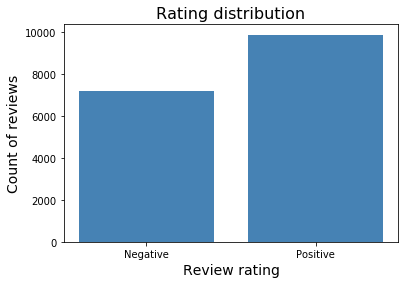

In [1210]:
#plot the review distribution again
values, counts = np.unique(simpledf['Reviewer_Score'], return_counts=True)

plt.figure()
plt.bar(values, counts, color='steelblue')
plt.title('Rating distribution', fontsize=16)
plt.xticks(np.arange(2), ('Negative', 'Positive'))
plt.xlabel('Review rating', fontsize=14)
plt.ylabel('Count of reviews', fontsize=14)

#### Convert the columns you identified in question 2 into numeric columns, and drop all non-numeric columns except Positive_Review and Negative_Review.

In [1211]:
# starting with days_since_review, removing the text from it
simpledf['days_since_review']  = simpledf.days_since_review.str.strip('days')
#now making it int
simpledf['days_since_review'] = pd.to_numeric(simpledf['days_since_review'])

In [1212]:
#convert date to datetime
simpledf['Review_Date'] = pd.to_datetime(simpledf['Review_Date'])

In [1213]:
simpledf.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
10030,1 Waterview Drive Greenwich London SE10 0TW Un...,1258,2016-07-19,9.4,Intercontinental London The O2,United Kingdom,We only had one night in it,9,4204,This hotel was excellent,6,2,1,"[' Leisure trip ', ' Couple ', ' Superior King...",380,51.502435,-0.000250
135077,Cardington Street Euston Camden London NW1 2LP...,744,2015-09-09,8.3,Thistle Euston,United Kingdom,No Negative,0,2474,It s location suited our plans for our stay i...,12,1,1,"[' Leisure trip ', ' Couple ', ' Standard Doub...",694,51.529142,-0.137278
105811,57 59 Welbeck Street Westminster Borough Londo...,241,2015-10-31,7.5,Holiday Inn London Oxford Circus,United Kingdom,Rooms a little tired Needing a lick of paint,10,1287,The location and staff excellent,6,1,0,"[' Leisure trip ', ' Family with older childre...",642,51.516843,-0.149557
25779,142 To 144 Warwick Way Victoria Westminster Bo...,31,2017-05-24,8.7,Windermere Hotel,United Kingdom,No Negative,0,221,Reception when we arrived and as we left,10,9,1,"[' Leisure trip ', ' Group ', ' Superior Twin ...",71,51.490372,-0.145922
15180,101 Buckingham Palace Road Westminster Borough...,838,2016-12-14,8.4,The Grosvenor,United Kingdom,The tv didn t have a very good picture,10,3274,The room was a lot bigger than we expected an...,17,1,1,"[' Leisure trip ', ' Couple ', ' Deluxe Double...",232,51.495666,-0.145279


In [1214]:
#I can use the date as a categorical columns, let's say day of the week
dayofWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
simpledf['Review_Date'] = simpledf['Review_Date'].dt.dayofweek.map(dayofWeek)

In [1215]:
#In order to make this useful I'll apply the OneHotEncoding
dummies = pd.get_dummies(simpledf.Review_Date)
dummies

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
10030,0,0,0,0,0,1,0
135077,0,0,0,0,0,0,1
105811,0,0,1,0,0,0,0
25779,0,0,0,0,0,0,1
15180,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
7398,0,0,0,1,0,0,0
139373,0,0,0,1,0,0,0
31659,0,0,0,0,0,0,1
158050,0,0,0,0,0,1,0


In [1216]:
#Merged onehot encoder to original dataframe - they will be on the end columns.
simpledf =pd.concat([simpledf, dummies] , axis = 'columns')
simpledf.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,days_since_review,lat,lng,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
10030,1 Waterview Drive Greenwich London SE10 0TW Un...,1258,Tuesday,9.4,Intercontinental London The O2,United Kingdom,We only had one night in it,9,4204,This hotel was excellent,...,380,51.502435,-0.000250,0,0,0,0,0,1,0
135077,Cardington Street Euston Camden London NW1 2LP...,744,Wednesday,8.3,Thistle Euston,United Kingdom,No Negative,0,2474,It s location suited our plans for our stay i...,...,694,51.529142,-0.137278,0,0,0,0,0,0,1
105811,57 59 Welbeck Street Westminster Borough Londo...,241,Saturday,7.5,Holiday Inn London Oxford Circus,United Kingdom,Rooms a little tired Needing a lick of paint,10,1287,The location and staff excellent,...,642,51.516843,-0.149557,0,0,1,0,0,0,0
25779,142 To 144 Warwick Way Victoria Westminster Bo...,31,Wednesday,8.7,Windermere Hotel,United Kingdom,No Negative,0,221,Reception when we arrived and as we left,...,71,51.490372,-0.145922,0,0,0,0,0,0,1
15180,101 Buckingham Palace Road Westminster Borough...,838,Wednesday,8.4,The Grosvenor,United Kingdom,The tv didn t have a very good picture,10,3274,The room was a lot bigger than we expected an...,...,232,51.495666,-0.145279,0,0,0,0,0,0,1


In [1217]:
#drop the original date column. 
simpledf = simpledf.drop(['Review_Date'], axis = 'columns')
simpledf.head()

# On this step I considered also dropping one of the weekdays columns, but since I don't yet know what model will be used I left it in for now.


,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,...,days_since_review,lat,lng,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
10030,1 Waterview Drive Greenwich London SE10 0TW Un...,1258,9.4,Intercontinental London The O2,United Kingdom,We only had one night in it,9,4204,This hotel was excellent,6,...,380,51.502435,-0.000250,0,0,0,0,0,1,0
135077,Cardington Street Euston Camden London NW1 2LP...,744,8.3,Thistle Euston,United Kingdom,No Negative,0,2474,It s location suited our plans for our stay i...,12,...,694,51.529142,-0.137278,0,0,0,0,0,0,1
105811,57 59 Welbeck Street Westminster Borough Londo...,241,7.5,Holiday Inn London Oxford Circus,United Kingdom,Rooms a little tired Needing a lick of paint,10,1287,The location and staff excellent,6,...,642,51.516843,-0.149557,0,0,1,0,0,0,0
25779,142 To 144 Warwick Way Victoria Westminster Bo...,31,8.7,Windermere Hotel,United Kingdom,No Negative,0,221,Reception when we arrived and as we left,10,...,71,51.490372,-0.145922,0,0,0,0,0,0,1
15180,101 Buckingham Palace Road Westminster Borough...,838,8.4,The Grosvenor,United Kingdom,The tv didn t have a very good picture,10,3274,The room was a lot bigger than we expected an...,17,...,232,51.495666,-0.145279,0,0,0,0,0,0,1


In [1218]:
# Drop other text Columns
simpledf.drop(['Hotel_Address', 'Hotel_Name', 'Reviewer_Nationality', 'Tags'], axis=1, inplace = True)

In [1219]:
simpledf.dtypes

Additional_Number_of_Scoring                    int64
Average_Score                                 float64
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                  int64
days_since_review                               int64
lat                                           float64
lng                                           float64
Friday                                          uint8
Monday                                          uint8
Saturday                                        uint8
Sunday                                          uint8
Thursday                                        uint8
Tuesday                                         uint8
Wednesday                   

In [1220]:
simpledf.head(1)

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,lng,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
10030,1258,9.4,We only had one night in it,9,4204,This hotel was excellent,6,2,1,380,51.502435,-0.00025,0,0,0,0,0,1,0


#### Split the data into train and test sets

In [1221]:
from sklearn.model_selection import train_test_split
# store simplified data in X and y
#added space so that split word does not mix words from the two reviews

X = simpledf['Positive_Review']+ ' '+ simpledf['Negative_Review']
y = simpledf['Reviewer_Score']

In [1222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [1223]:
y_train.shape

(11945,)

In [1224]:
X_train.shape

(11945,)

Use a TF-IDF vectorizer to combine Positive_Review and Negative_Review with the numeric data (notice that this is done AFTER the train/test split). You may have to adjust the min_df parameter.

In [1225]:
# Insert X in the data frame so that simpledf has a colum with combined text data
simpledf =pd.concat([simpledf, X] , axis = 'columns', )
simpledf.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,lng,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,0
10030,1258,9.4,We only had one night in it,9,4204,This hotel was excellent,6,2,1,380,51.502435,-0.000250,0,0,0,0,0,1,0,This hotel was excellent We only had one ni...
135077,744,8.3,No Negative,0,2474,It s location suited our plans for our stay i...,12,1,1,694,51.529142,-0.137278,0,0,0,0,0,0,1,It s location suited our plans for our stay i...
105811,241,7.5,Rooms a little tired Needing a lick of paint,10,1287,The location and staff excellent,6,1,0,642,51.516843,-0.149557,0,0,1,0,0,0,0,The location and staff excellent Rooms a lit...
25779,31,8.7,No Negative,0,221,Reception when we arrived and as we left,10,9,1,71,51.490372,-0.145922,0,0,0,0,0,0,1,Reception when we arrived and as we left No ...
15180,838,8.4,The tv didn t have a very good picture,10,3274,The room was a lot bigger than we expected an...,17,1,1,232,51.495666,-0.145279,0,0,0,0,0,0,1,The room was a lot bigger than we expected an...


In [1226]:
#I'll drop the two original review text columns as I have already combined them
simpledf.drop(['Negative_Review','Positive_Review'],axis=1, inplace = True)
simpledf.head(1)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,lng,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,0
10030,1258,9.4,9,4204,6,2,1,380,51.502435,-0.00025,0,0,0,0,0,1,0,This hotel was excellent We only had one ni...


In [1234]:
#Just give a name to recently created column
simpledf.rename(columns={simpledf.columns[-1]:'Review'}, inplace=True)

In [1235]:
simpledf.head(1)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,lng,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Review
10030,1258,9.4,9,4204,6,2,1,380,51.502435,-0.00025,0,0,0,0,0,1,0,This hotel was excellent We only had one ni...


Now I'm only one column away from having a numerical only dataframe

###  Use a TF-IDF vectorizer to combine Positive_Review and Negative_Review with the numeric data (notice that this is done AFTER the train/test split). You may have to adjust the min_df parameter.

In [1236]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [1237]:
#Set my Tokenizer
nltk.download('stopwords')

import nltk
import string

stemmer = nltk.stem.PorterStemmer()

from nltk.corpus import stopwords 
ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    
    for punctuation_mark in string.punctuation:
        # Remove punctuation and set to lower case
        sentence = sentence.lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
        
    # Remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\renan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1238]:
#Set my Vectorizer
v = TfidfVectorizer(min_df=15, stop_words="english",tokenizer=my_tokenizer, ngram_range=(2,3))

#Set a dataframe using the transformed tokens
x1 = v.fit_transform(simpledf['Review'])

#define a new dataframe using the same index as the original dataframe, the colum names as tokens
df1 = pd.DataFrame(x1.toarray(),index=simpledf.index, columns=v.get_feature_names())

#combine both data frames to have the original features and the tokens toghether
res = pd.concat([simpledf, df1], axis=1)

#Drop the last string column and now we should have a dataframe with numbers only
res.drop(['Review'], axis=1)

C:\Users\renan\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,lng,...,window view,wish stay,wish stay longer,wonder stay,work hotel,work properli,work room,worth money,year ago,year old
10030,1258,9.4,9,4204,6,2,1,380,51.502435,-0.000250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135077,744,8.3,0,2474,12,1,1,694,51.529142,-0.137278,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105811,241,7.5,10,1287,6,1,0,642,51.516843,-0.149557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25779,31,8.7,0,221,10,9,1,71,51.490372,-0.145922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15180,838,8.4,10,3274,17,1,1,232,51.495666,-0.145279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7398,704,8.3,0,2443,35,1,0,571,51.491959,-0.220096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139373,193,7.5,7,587,14,5,1,144,51.603207,0.010607,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31659,2682,7.1,47,9086,2,1,0,43,51.501910,-0.023221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158050,1831,8.1,0,7105,24,1,1,135,51.499046,-0.191707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1240]:
#Check the resulting dataframe
res.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,lng,...,window view,wish stay,wish stay longer,wonder stay,work hotel,work properli,work room,worth money,year ago,year old
10030,1258,9.4,9,4204,6,2,1,380,51.502435,-0.000250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135077,744,8.3,0,2474,12,1,1,694,51.529142,-0.137278,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105811,241,7.5,10,1287,6,1,0,642,51.516843,-0.149557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25779,31,8.7,0,221,10,9,1,71,51.490372,-0.145922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15180,838,8.4,10,3274,17,1,1,232,51.495666,-0.145279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1241]:
#List my column names
list(res.columns)

['Additional_Number_of_Scoring',
 'Average_Score',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'Reviewer_Score',
 'days_since_review',
 'lat',
 'lng',
 'Friday',
 'Monday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday',
 'Review',
 '1 night',
 '10 10',
 '10 15',
 '10 30',
 '10 min',
 '10 min walk',
 '10 minut',
 '10 minut walk',
 '12 5',
 '15 min',
 '15 minut',
 '15 minut walk',
 '1st floor',
 '2 hour',
 '2 min',
 '2 min walk',
 '2 minut',
 '2 minut walk',
 '2 night',
 '2 peopl',
 '2 room',
 '2 singl',
 '20 min',
 '20 minut',
 '24 hour',
 '3 4',
 '3 night',
 '3 time',
 '30 min',
 '30 minut',
 '3rd floor',
 '4 5',
 '4 star',
 '4 star hotel',
 '45 minut',
 '5 hotel',
 '5 min',
 '5 min walk',
 '5 minut',
 '5 minut walk',
 '5 star',
 '5 star hotel',
 '5th floor',
 '6th floor',
 '7th floor',
 'abl check',
 'abl leav',
 'absolut love',
 'absolut noth',
 'access london',

In [1259]:
#Check weight of each word in the resulting data frame
df1 = pd.DataFrame(x1.toarray(),index=simpledf.index, columns=v.get_feature_names())
df1.sum(axis=0).sort_values(ascending=False)

great locat             250.811953
staff friendli          234.351983
friendli staff          232.772373
staff help              203.191030
friendli help           185.482695
                           ...    
westfield shop centr      5.350670
3 night                   5.238765
15 minut walk             4.913247
walk nearest tube         4.805234
minut walk tube           4.649077
Length: 2049, dtype: float64

### What does the min_df parameter do?

Min_DF is used to eimitate tokens (words or conbination of words)that appear not too often. if min_df is set to 4 it will only consider tokens that appear at least in 4 documents. It can also be set as a fraction. So if set as 0.01 it will only consider tokens that appear in more than 1% of the documents.